In [3]:
!pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [5]:
# Define the path to the raw data directory
raw_data_path = '../data/raw/'

# List of CSV files
csv_files = ['PTS_Bio_Pairs_01.csv', 'PTS_Bio_Pairs_02.csv', 'PTS_Bio_Pairs_03.csv']

# Initialize an empty list to store DataFrames
df_list = []

# Iterate through the CSV files and load them
for file in csv_files:
    file_path = raw_data_path + file
    df = pd.read_csv(file_path, encoding='utf-8')
    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
data = pd.concat(df_list, ignore_index=True)

# Display the first few rows
data.head()


,Early_Bio,Later_Bio
0,ཞąყɖɛŋ ♡,NaN
1,Empowered Patient Coalition 501 c 3. Advocates...,Empowered Patient Coalition 501 c 3. Advocates...
2,Bacon Social House is founded on the belief th...,"Serving bacon-centric fare in a fun, high ener..."
3,"17 anos, Flamenguista, Amo minha familia, amig...","webcrente, sonseriana, vegetariana e viajante ..."
4,Making women powerful. Keeping democracy healt...,Founder of @VoteRunLead. Making women powerful...


In [6]:
# Check the dimensions
print(f"Total Rows: {data.shape[0]}")
print(f"Total Columns: {data.shape[1]}")

# Get column names
print("Columns:", data.columns.tolist())

# Summary statistics
data.describe()


Total Rows: 337623
Total Columns: 2
Columns: ['Early_Bio', 'Later_Bio']


,Early_Bio,Later_Bio
count,302551,303647
unique,298674,298892
top,¯\_(ツ)_/¯,she/her
freq,66,101


In [8]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Early_Bio    35072
Later_Bio    33976
dtype: int64


In [12]:
import re

def clean_text(text):
    """
    Cleans the input text by removing URLs, special characters, and extra spaces.
    """
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove non-ASCII characters
    text = text.encode('ascii', 'ignore').decode()
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Remove null values
    text = re.sub('nan', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning function to 'Early_Bio' and 'Later_Bio' columns
data['Early_Bio'] = data['Early_Bio'].astype(str).apply(clean_text)
data['Later_Bio'] = data['Later_Bio'].astype(str).apply(clean_text)

# Drop rows where both bios are empty after cleaning
data.dropna(subset=['Early_Bio', 'Later_Bio'], how='all', inplace=True)

# Fill empty bios with empty strings
data['Early_Bio'].fillna('', inplace=True)
data['Later_Bio'].fillna('', inplace=True)

# Verify cleaning
data.head()

,Early_Bio,Later_Bio,Early_Bio_Length,Later_Bio_Length
0,,,0,3
1,empowered patient coalition c advocates devote...,empowered patient coalition c advocates devote...,122,122
2,bacon social house is founded on the belief th...,serving baconcentric fare in a fun high energy...,139,114
3,anos flamenguista amo minha familia amigos e o...,webcrente sonseriana vegetariana e viajante ig...,127,57
4,making women powerful keeping democracy health...,founder of voterunlead making women powerful k...,57,100


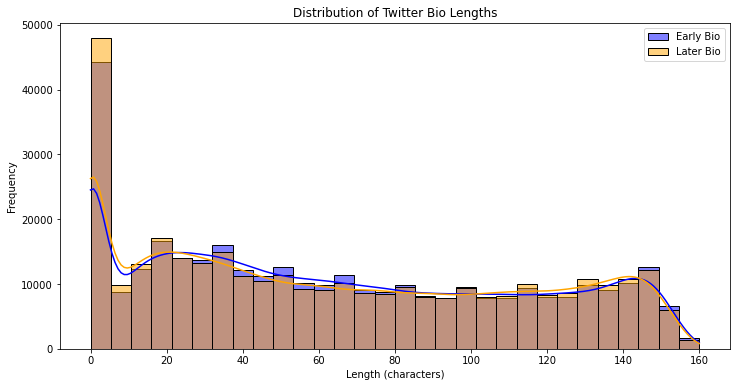

Correlation between Early and Later Bio Lengths: 0.66


In [13]:
# Calculate bio lengths
data['Early_Bio_Length'] = data['Early_Bio'].apply(len)
data['Later_Bio_Length'] = data['Later_Bio'].apply(len)

# Plot distributions
plt.figure(figsize=(12, 6))
sns.histplot(data['Early_Bio_Length'], bins=30, kde=True, color='blue', label='Early Bio')
sns.histplot(data['Later_Bio_Length'], bins=30, kde=True, color='orange', label='Later Bio')
plt.legend()
plt.title('Distribution of Twitter Bio Lengths')
plt.xlabel('Length (characters)')
plt.ylabel('Frequency')
plt.show()

# Correlation between early and later bio lengths
correlation = data['Early_Bio_Length'].corr(data['Later_Bio_Length'])
print(f"Correlation between Early and Later Bio Lengths: {correlation:.2f}")


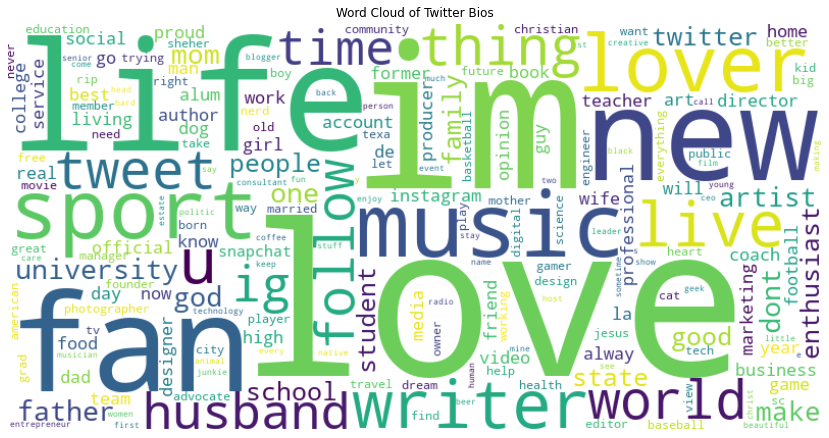

In [14]:
# Combine all bios
all_bios = ' '.join(data['Early_Bio'].tolist() + data['Later_Bio'].tolist())

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=STOPWORDS, collocations=False).generate(all_bios)

# Display the Word Cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Twitter Bios')
plt.show()


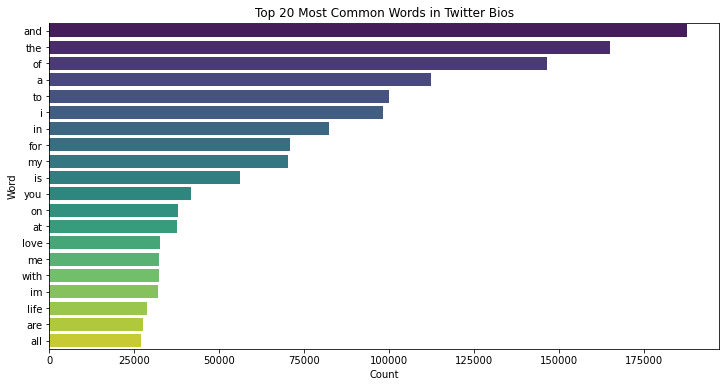

In [15]:
from collections import Counter

# Split all bios into words
all_words = all_bios.split()

# Count word frequencies
word_counts = Counter(all_words)

# Get the top 20 most common words
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Top 20 Most Common Words in Twitter Bios')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()
